<a href="https://colab.research.google.com/github/luislemuspaz/Ciencia-de-Datos-en-Python/blob/master/data_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Marketing

Este conjunto de datos se extrajo de la plataforma de Kaggle y se proporcionó a estudiantes para un proyecto final con el fin de probar sus habilidades de análisis estadístico como parte de una maestría en Business Analytics. Se puede utilizar para EDA (análisis exploratorio de datos), análisis estadístico y visualizaciones. 

El conjunto de datos marketing_data.csv consta de 2240 clientes de la empresa XYZ con datos sobre perfiles de clientes, preferencias de producto, éxitos y fracasos de campaña y rendimiento de los canales.

In [1]:
import numpy as np
import pandas as pd

In [2]:
url = ("https://raw.githubusercontent.com/luislemuspaz/Ciencia-de-Datos-en-Python/master/marketing_data.csv")
df = pd.read_csv(url)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,05/11/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,04/08/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [3]:
df.shape

(2240, 28)

## Summarize Data Parte 2

Compararemos a los clientes que aceptaron la oferta en la primera campaña con los que aceptaron la oferta en la sexta y última campaña.

In [4]:
firstc = df[df["AcceptedCmp1"] == 1]
lastc = df[df["Response"] == 1]
print(firstc.shape, lastc.shape)

(144, 28) (334, 28)


In [5]:
tc1 = ((firstc.shape[0] / df.shape[0])*100)

In [6]:
print("La tasa de conversión en la primera campaña fue de " + str(tc1) + "%")

La tasa de conversión en la primera campaña fue de 6.428571428571428%


In [7]:
firstc.mean()

ID                     5324.493056
Year_Birth             1968.534722
Kidhome                   0.090278
Teenhome                  0.215278
Recency                  46.979167
MntWines                758.604167
MntFruits                55.847222
MntMeatProducts         433.638889
MntFishProducts          91.861111
MntSweetProducts         65.138889
MntGoldProds             77.131944
NumDealsPurchases         1.416667
NumWebPurchases           5.729167
NumCatalogPurchases       6.097222
NumStorePurchases         8.062500
NumWebVisitsMonth         3.534722
AcceptedCmp3              0.166667
AcceptedCmp4              0.326389
AcceptedCmp5              0.472222
AcceptedCmp1              1.000000
AcceptedCmp2              0.090278
Response                  0.548611
Complain                  0.000000
dtype: float64

In [8]:
lastc.mean()

ID                     5421.820359
Year_Birth             1969.416168
Kidhome                   0.341317
Teenhome                  0.305389
Recency                  35.383234
MntWines                502.703593
MntFruits                38.203593
MntMeatProducts         294.353293
MntFishProducts          52.050898
MntSweetProducts         38.634731
MntGoldProds             61.446108
NumDealsPurchases         2.335329
NumWebPurchases           5.071856
NumCatalogPurchases       4.203593
NumStorePurchases         6.095808
NumWebVisitsMonth         5.293413
AcceptedCmp3              0.230539
AcceptedCmp4              0.185629
AcceptedCmp5              0.275449
AcceptedCmp1              0.236527
AcceptedCmp2              0.059880
Response                  1.000000
Complain                  0.008982
dtype: float64

***¿Quiénes son más jovenes?*** 

In [9]:
print(firstc.mean()[1], lastc.mean()[1])

1968.5347222222222 1969.4161676646706


No existe una diferencia significativa, pero los que compraron en la última campaña son más jóvenes.

***¿Qué cantidad de niños tienen en casa los dos grupos de clientes?*** 

In [10]:
print(firstc.mean()[2], lastc.mean()[2])

0.09027777777777778 0.3413173652694611


Los clientes que respondieron en la primera campaña tienen menos niños en casa que el otro grupo de clientes.

***Número de días desde la última compra***

In [11]:
print(firstc.mean()[4], lastc.mean()[4])

46.979166666666664 35.383233532934135


Los clientes que compraron en la última campaña tienen menos días de haber realizado la última compra.

***¿Quiénes consumen más vino?***

In [12]:
print(firstc.mean()[5], lastc.mean()[5])

758.6041666666666 502.70359281437123


Los clientes que respondieron en la primera campaña consumen más vino que el otro grupo de clientes.

***¿Qué grupo de clientes ha tenido más reclamos?***

In [13]:
print(firstc.mean()[-1], lastc.mean()[-1])

0.0 0.008982035928143712


Los clientes que respondieron a la primera campaña no tienen ninguna reclamo.

**Otras funciones resumidas**

In [14]:
std1 = firstc.std()
std6 = lastc.std()

In [15]:
print("El promedio de días desde la última compra para los clientes que compraron con la primera campaña son de " + str(firstc.mean()[4]) + " con una desviación de " + str(std1[4]))

El promedio de días desde la última compra para los clientes que compraron con la primera campaña son de 46.979166666666664 con una desviación de 28.380646599374746


***Recordemos que podemos utilizar la función "describe" para resumir los estadísticos de todas las variables***

In [16]:
firstc.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.0,144.000000,144.000000,144.0
mean,5324.493056,1968.534722,0.090278,0.215278,46.979167,758.604167,55.847222,433.638889,91.861111,65.138889,77.131944,1.416667,5.729167,6.097222,8.062500,3.534722,0.166667,0.326389,0.472222,1.0,0.090278,0.548611,0.0
std,3078.326355,13.530547,0.332677,0.445069,28.380647,333.571922,55.342079,263.292935,73.293892,54.960203,65.122289,1.371539,2.178146,2.517962,2.699958,2.044653,0.373979,0.470528,0.500970,0.0,0.287580,0.499368,0.0
min,146.000000,1944.000000,0.000000,0.000000,1.000000,152.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.0
25%,2793.750000,1957.000000,0.000000,0.000000,25.000000,502.000000,19.750000,196.000000,32.000000,22.750000,29.750000,1.000000,4.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.0
50%,4901.500000,1969.500000,0.000000,0.000000,45.500000,761.500000,29.500000,437.500000,76.000000,46.500000,49.500000,1.000000,5.000000,6.000000,8.000000,3.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.0
75%,7896.750000,1979.000000,0.000000,0.000000,71.250000,1006.750000,87.750000,614.750000,146.250000,98.000000,112.500000,1.000000,7.000000,8.000000,10.000000,5.000000,0.000000,1.000000,1.000000,1.0,0.000000,1.000000,0.0
max,10965.000000,1994.000000,2.000000,2.000000,99.000000,1493.000000,190.000000,974.000000,253.000000,194.000000,245.000000,8.000000,11.000000,11.000000,13.000000,9.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.0


## Group Data - Educación

In [17]:
df.groupby(by = "Education")["AcceptedCmp1"].sum()

Education
2n Cycle      14
Basic          0
Graduation    82
Master        18
PhD           30
Name: AcceptedCmp1, dtype: int64

In [18]:
df.groupby(by = "Education")["AcceptedCmp1"].count()

Education
2n Cycle       203
Basic           54
Graduation    1127
Master         370
PhD            486
Name: AcceptedCmp1, dtype: int64

In [19]:
conversions_by_edu = df.groupby(by = "Education")["AcceptedCmp1"].sum() / df.groupby(by = "Education")["AcceptedCmp1"].count() * 100

In [20]:
conversions_by_edu = pd.DataFrame(conversions_by_edu)

In [37]:
conversions_by_edu

,AcceptedCmp1
Education,
2n Cycle,6.896552
Basic,0.000000
Graduation,7.275954
Master,4.864865
PhD,6.172840


In [38]:
import matplotlib.pyplot as plt

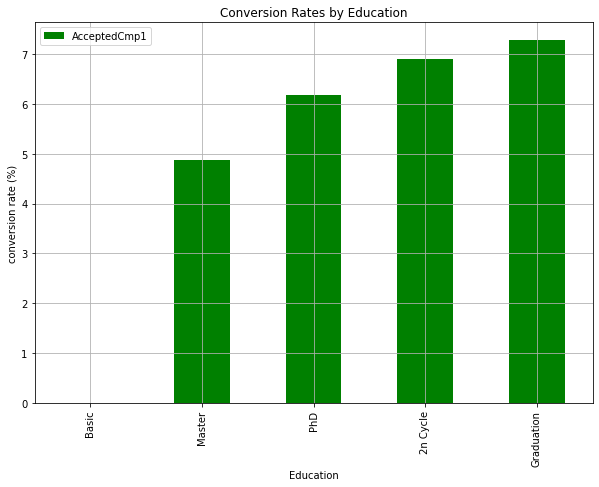

In [43]:
axx = conversions_by_edu.loc[["Basic", "Master", "PhD", "2n Cycle", "Graduation"]].plot(
kind = "bar", color = "green", grid = True, figsize = (10, 7), title = "Conversion Rates by Education")
axx.set_xlabel("Education")
axx.set_ylabel("conversion rate (%)")
plt.show()

Existe una mayor conversión en la primera campaña con las personas Graduadas.

## Group Data - Reclamos

In [22]:
df.groupby(by = "Complain")["AcceptedCmp1"].sum()

Complain
0    144
1      0
Name: AcceptedCmp1, dtype: int64

In [23]:
df.groupby(by = "Complain")["AcceptedCmp1"].count()

Complain
0    2219
1      21
Name: AcceptedCmp1, dtype: int64

In [24]:
conversions_by_complain = df.groupby(by = "Complain")["AcceptedCmp1"].sum() / df.groupby(by = "Complain")["AcceptedCmp1"].count() * 100

In [25]:
conversions_by_complain = pd.DataFrame(conversions_by_complain)

In [41]:
conversions_by_complain

,AcceptedCmp1
Complain,
0,6.48941
1,0.00000


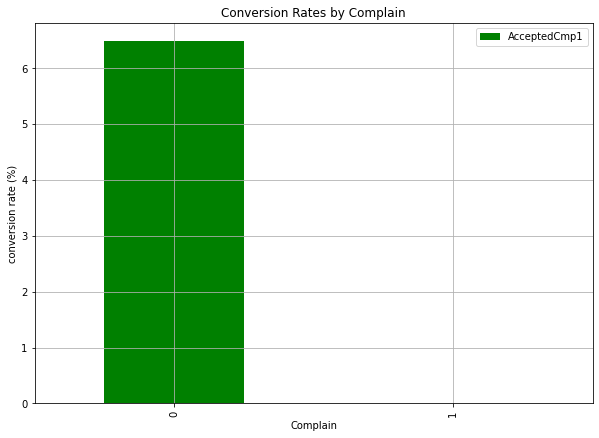

In [45]:
axy = conversions_by_complain.loc[[0, 1]].plot(
kind = "bar", color = "green", grid = True, figsize = (10, 7), title = "Conversion Rates by Complain")
axy.set_xlabel("Complain")
axy.set_ylabel("conversion rate (%)")
plt.show()

Con los dos últimos Group By podemos observar que para aumentar las probabilidades de que una persona compre el producto con la primera campaña será importante enfocarse en las que no tienen reclamos, en las que se hayan graduado, tengan PhD o estén en el segundo ciclo. Será importante no considerar a las personas con educación básica.

## ¿Existen clientes que compraron en más de una campaña?

In [27]:
df["Compras Totales"] = df.AcceptedCmp1 + df.AcceptedCmp2 + df.AcceptedCmp3 + df.AcceptedCmp4 + df.AcceptedCmp5 + df.Response

In [28]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Compras Totales
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,1
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,2
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,0
3,1386,1967,Graduation,Together,"$32,474.00",1,1,05/11/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,0
4,5371,1989,Graduation,Single,"$21,474.00",1,0,04/08/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,2


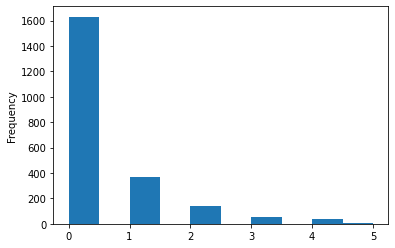

In [29]:
df["Compras Totales"].plot.hist()

In [30]:
df.groupby(by = "Compras Totales")["Compras Totales"].count()

Compras Totales
0    1631
1     370
2     142
3      51
4      36
5      10
Name: Compras Totales, dtype: int64

In [31]:
cinco_compras = df[df["Compras Totales"] == 5]

In [32]:
cinco_compras.shape

(10, 29)

In [33]:
cinco_compras

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Compras Totales
38,3725,1961,PhD,Single,"$84,865.00",0,0,05/09/2013,1,1248,16,349,43,16,16,1,2,4,9,4,0,1,1,1,1,1,0,SP,5
142,10089,1974,Graduation,Divorced,"$102,692.00",0,0,04/05/2013,5,168,148,444,32,172,148,1,6,9,13,2,0,1,1,1,1,1,0,SA,5
152,8545,1954,Graduation,Divorced,"$85,683.00",0,0,3/21/14,6,1296,17,311,45,69,51,1,2,4,10,1,0,1,1,1,1,1,0,SP,5
522,5758,1982,Graduation,Married,"$65,169.00",0,0,1/14/14,23,1074,0,69,0,0,46,1,10,4,13,6,1,0,1,1,1,1,0,SP,5
724,477,1986,Graduation,Married,"$83,512.00",0,0,6/17/14,31,1060,61,835,80,20,101,1,4,7,10,1,1,0,1,1,1,1,0,SP,5
1385,3174,1959,Graduation,Together,"$87,771.00",0,1,5/22/13,61,1492,38,287,50,57,33,1,5,10,4,6,0,1,1,1,1,1,0,SP,5
1386,5536,1959,Graduation,Together,"$87,771.00",0,1,5/22/13,61,1492,38,287,50,57,33,1,5,10,4,6,0,1,1,1,1,1,0,CA,5
1813,1509,1958,PhD,Together,"$84,460.00",0,0,01/04/2013,80,152,27,103,106,54,81,0,9,9,4,5,0,1,1,1,1,1,0,SP,5
1913,3138,1956,Graduation,Single,"$91,249.00",0,0,10/20/12,84,1324,27,119,71,108,27,0,7,9,6,4,0,1,1,1,1,1,0,SP,5
2125,3520,1990,Master,Single,"$91,172.00",0,0,3/27/13,94,162,28,818,0,28,56,0,4,3,7,3,1,0,1,1,1,1,0,CA,5


In [34]:
cinco_compras.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Compras Totales
count,10.000000,10.000000,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.0,10.0,10.0,10.0,10.0,10.0
mean,4547.100000,1967.900000,0.0,0.200000,44.600000,946.800000,40.000000,362.200000,47.700000,58.100000,59.200000,0.700000,5.400000,6.90000,8.000000,3.800000,0.300000,0.700000,1.0,1.0,1.0,1.0,0.0,5.0
std,2991.424352,13.706851,0.0,0.421637,35.581518,561.007982,41.231056,271.699916,33.035503,50.669846,40.325895,0.483046,2.674987,2.84605,3.527668,1.988858,0.483046,0.483046,0.0,0.0,0.0,0.0,0.0,0.0
min,477.000000,1954.000000,0.0,0.000000,1.000000,152.000000,0.000000,69.000000,0.000000,0.000000,16.000000,0.000000,2.000000,3.00000,4.000000,1.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,0.0,5.0
25%,3147.000000,1958.250000,0.0,0.000000,10.250000,391.000000,19.500000,161.000000,34.750000,22.000000,33.000000,0.250000,4.000000,4.00000,4.500000,2.250000,0.000000,0.250000,1.0,1.0,1.0,1.0,0.0,5.0
50%,3622.500000,1960.000000,0.0,0.000000,46.000000,1161.000000,27.500000,299.000000,47.500000,55.500000,48.500000,1.000000,5.000000,8.00000,8.000000,4.000000,0.000000,1.000000,1.0,1.0,1.0,1.0,0.0,5.0
75%,5702.500000,1980.000000,0.0,0.000000,75.250000,1317.000000,38.000000,420.250000,65.750000,66.000000,74.750000,1.000000,6.750000,9.00000,10.000000,5.750000,0.750000,1.000000,1.0,1.0,1.0,1.0,0.0,5.0
max,10089.000000,1990.000000,0.0,1.000000,94.000000,1492.000000,148.000000,835.000000,106.000000,172.000000,148.000000,1.000000,10.000000,10.00000,13.000000,6.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,0.0,5.0


Los clientes que realizaron compra por cada campaña no tienen hijos en casa, están graduados en su mayoría, no tienen reclamos y en promedio tienen 3.8 visitas a la página web.